# US15 - Average Monthly Water Consumption Cost Based on Park Area

To predict the average monthly cost associated with water consumption in a new park with an area of 55 hectares, we will use a simple linear regression model. Considering the park area as the independent variable ($x$) and the average monthly water cost as the dependent variable ($y$), we will describe the steps and formulas used for this analysis, including the coefficient of determination ($r^2$), which measures the quality of the model fit.

$$
Sxx = \sum_{i=1}^{n} (x_i - \bar{x})^2
$$
$Sxx$ represents the sum of squares of the differences from the mean value of $x$.

$$
Syy = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$
$Syy$ is a measure of the total variability of $y_i$ relative to the mean of $y$ ($\bar{y}$).

$$
Sxy = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$
$Sxy$ represents the sum of the product of the differences between the $x$ values and the mean of $x$ ($\bar{x}$) and the differences between the $y$ values and the mean of $y$ ($\bar{y}$).

$$
\hat{\beta_1} = \frac{Sxy}{Sxx}
$$
($\hat{\beta_1}$) is the slope, indicating how $y$ changes with a unit increase in $x$.

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \cdot \bar{x}
$$
($\hat{\beta_0}$) is the y-intercept, or the value of $y$ when $x = 0$.

$$
\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} \cdot x_i
$$
This is the formula for the regression line, where ($\hat{y}$) is the predicted value of $y$ for a given value of $x_i$. In this case, substitute $x_i = 55$ to obtain the prediction.

$$
\hat{e_i} = y_i - \hat{y_i}
$$
The residuals represent the difference between the observed values and the predicted values, whose geometric meaning is the vertical distance from the observations $y_i$ to the regression line. An ideal model would have residuals close to zero.

$$
sqe = \sum_{i=1}^{n} (\hat{e_i})^2 = Syy - \frac{S^2_{xy}}{Sxx}
$$
The SSE (Sum of Squares for Error) measures the variability in $y$ values that is not explained by the regression model. The smaller the SSE, the better the model fit.

$$
r = \frac{Sxy}{\sqrt{Sxx \cdot Syy}}
$$
The Pearson sample correlation coefficient ($r$) indicates the degree and direction of the linear relationship between $x$ and $y$. Values of $r$ close to 1 or -1 indicate a strong positive or negative correlation, respectively, while values close to 0 indicate little or no linear correlation.

$$
r^2 = r \cdot r
$$
The coefficient of determination ($r^2$) measures the proportion of the variation in the average monthly water cost explained by the variation in the park area. Values of $r^2$ close to 1 indicate that a large proportion of the variability in $y$ is explained by the variability in $x$, indicating a good model fit.


# 2 - Code And Results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Carregar arquivos
water_data = pd.read_csv('water_consumption_updated.csv', delimiter=';')
water_data['Consumption'] = water_data['Consumption'].str.replace(',', '.').astype(float)

area_data = pd.read_csv('Area.csv', delimiter=';')
area_data['Area'] = area_data['Area'].str.replace(',', '.').astype(float)

# Filtrar dados de consumo de água atualizados
updated_water_data = water_data[(water_data['Consumption'] > 0) & (water_data['Consumption'].notnull())]


# Function to calculate the water cost given the consumption
def calculate_water_cost(consumption):
    if consumption <= 1000:
        return consumption * 0.7
    else:
        return 1000 * 0.7 + (consumption - 1000) * 0.7 * 1.15

In [3]:
# Calcular custo médio mensal
monthly_data = updated_water_data.groupby(['Park', 'Year', 'Month'])['Consumption'].sum().reset_index()
monthly_data['Cost'] = monthly_data['Consumption'].apply(calculate_water_cost).round(2)
monthly_data = pd.merge(monthly_data, area_data, on='Park')
average_monthly_data = monthly_data.groupby(['Park', 'Area'])['Cost'].mean().reset_index()
average_monthly_data['Cost'] = average_monthly_data['Cost'].round(2)

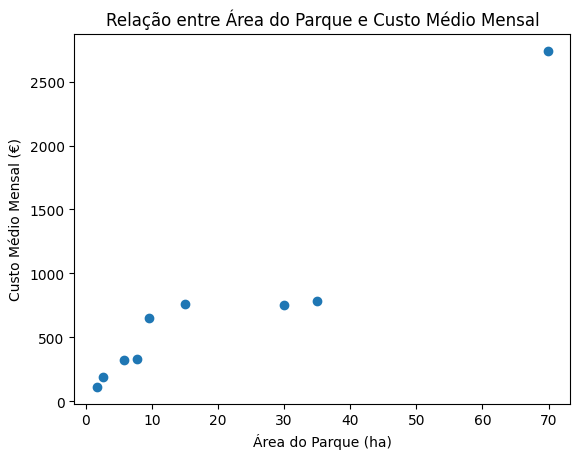

In [4]:
# Visualizar relação entre área do parque e custo médio mensal
plt.scatter(average_monthly_data['Area'], average_monthly_data['Cost'])
plt.xlabel('Área do Parque (ha)')
plt.ylabel('Custo Médio Mensal (€)')
plt.title('Relação entre Área do Parque e Custo Médio Mensal')
plt.show()

In [5]:
# Calcular coeficientes de regressão linear
Sxx = sum((average_monthly_data['Area'] - average_monthly_data['Area'].mean())**2)
Syy = sum((average_monthly_data['Cost'] - average_monthly_data['Cost'].mean())**2)
Sxy = sum((average_monthly_data['Area'] - average_monthly_data['Area'].mean()) * (average_monthly_data['Cost'] - average_monthly_data['Cost'].mean()))

beta1 = Sxy / Sxx
beta0 = average_monthly_data['Cost'].mean() - beta1 * average_monthly_data['Area'].mean()
sqe = Syy - Sxy**2 / Sxx
r = Sxy / (np.sqrt(Sxx * Syy))
r_squared = r**2

print(f'r = {r:.3f}')
print(f'r^2 = {r_squared:.3f}')

r = 0.946
r^2 = 0.896


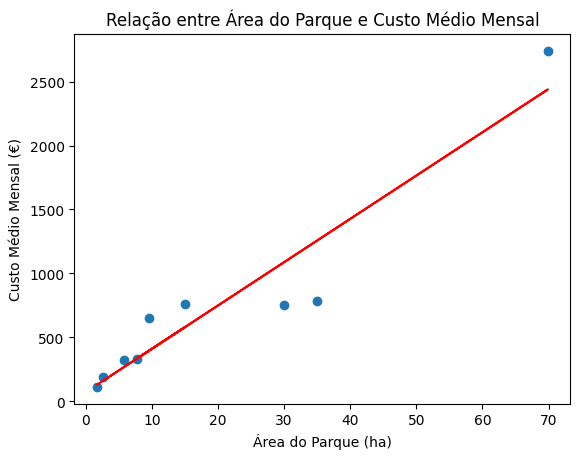

In [6]:
# Visualizar linha de regressão
model = stats.linregress(average_monthly_data['Area'], average_monthly_data['Cost'])
plt.scatter(average_monthly_data['Area'], average_monthly_data['Cost'])
plt.plot(average_monthly_data['Area'], model.intercept + model.slope * average_monthly_data['Area'], 'r')
plt.xlabel('Área do Parque (ha)')
plt.ylabel('Custo Médio Mensal (€)')
plt.title('Relação entre Área do Parque e Custo Médio Mensal')
plt.show()

In [7]:
# Previsão para um novo parque de 55 hectares
xp = 55
confianca = 0.95
ve = beta0 + beta1 * xp
n = len(average_monthly_data)
alpha = (1 - confianca) / 2
t = stats.t.ppf(1 - alpha, df=n - 2)
s_squared = sqe / (n - 2)
IC = t * np.sqrt(s_squared * (1 / n + (xp - average_monthly_data['Area'].mean())**2 / Sxx))

print(f'Valor esperado = {ve:.2f}')
print(f'IC = [{(ve - IC):.2f}, {(ve + IC):.2f}]')

Valor esperado = 1934.16
IC = [1510.27, 2358.06]


## 3 - Data Analysis and Interpretation of the Results

The data analysis reveals a positive linear relationship between the park area and the average monthly water consumption cost. This is intuitive as larger parks tend to consume more water due to the greater amount of vegetation, recreational areas, and other elements requiring water.

### Calculation of Regression Coefficients:

- The slope coefficient ($\beta_1$) was calculated as $\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}}$. This value represents the slope of the regression line, i.e., the rate of change of the cost with respect to the change in area.
- The intercept coefficient ($\beta_0$) was calculated as $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \cdot \bar{x}$. This value represents the point where the regression line intercepts the y-axis, i.e., the predicted cost when the park area is zero.

### Correlation and Determination Coefficients:

- The correlation coefficient (r) was found to be $r = 0.946$. The value close to 1 indicates a strong positive correlation between the park area and the average monthly cost, suggesting that the park area explains well the variation in the average monthly cost.
- The coefficient of determination ($r^2$) was calculated as $r^2 = 0.896$. It indicates that 89.6% of the variation in the average monthly water cost is explained by the variation in the park area. It suggests that the linear regression model is well fitted to the data.

### Cost Prediction for a New Park:

Using the regression line formula $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_i$, the average monthly water cost was predicted for a new park with 55 hectares.
The expected value for the monthly cost of a 55-hectare park is approximately 1934.16.
Additionally, a 95% confidence interval was calculated for this prediction, resulting in an interval of [1510.27, 2358.06].

## Interpretation of Results

### Fit Quality:

The coefficient of determination ($r^2$) of 0.896 indicates that the linear regression model is well fitted to the data, the monthly cost is explained by the park area.
The high positive correlation ($r = 0.946$) reinforces the presence of a strong linear relationship between the variables.

## Final Considerations

The cost prediction for the new 55-hectare park provides a specific expected value, useful for planning and budgeting.
The 95% confidence interval [1510.27, 2358.06] provides a margin of error for this prediction, allowing for a more realistic and prudent assessment of the cost.
Simple linear regression analysis proved effective in predicting the average monthly water consumption cost based on the park area. The high correlations indicate a strong linear relationship, and the regression coefficients provide a practical tool for future estimates. However, it is always important to consider other variables that may affect water consumption, such as climate, type of vegetation, and irrigation practices, for an even more accurate and comprehensive model.


# US16 - Polynomial Regression for Data Analysis

## 1 - Introduction

Polynomial regression is an extension of linear regression that models the relationship between a dependent variable $y$ and an independent variable $x$ as an $n$-th degree polynomial. This type of regression is useful when the data shows a non-linear relationship.

Given a dataset of execution times in nanoseconds against dataset sizes, we aim to determine the polynomial that best fits this data.

The key equations in polynomial regression are:

1. Polynomial equation of degree $ n $:

$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n $

2. Mean Squared Error (MSE):

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $

3. Coefficient of Determination ($ R^2 $):

$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $

where:

-$  SS_{res} $ is the sum of squares of residuals.

-$  SS_{tot} $ is the total sum of squares.


## 2 - Code and Results

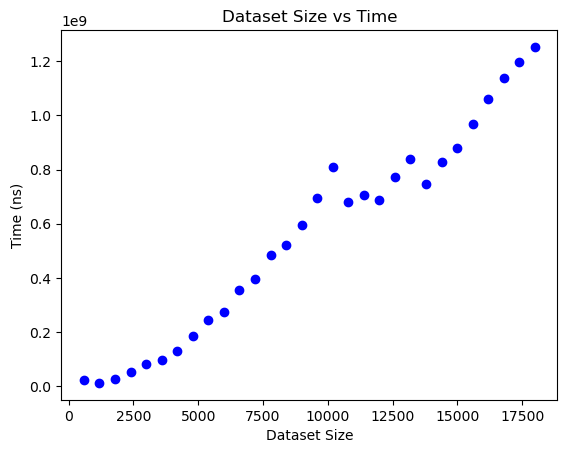

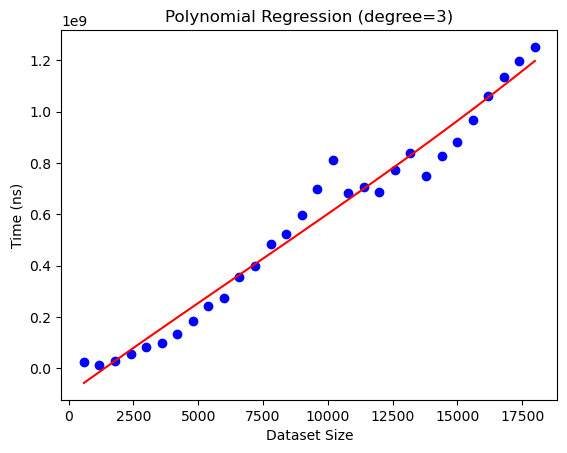

Mean Squared Error: 4238128022271970.5
R^2 Score: 0.97
Intercept: -100455048.73
Coefficients: [0.0, 72973.95, -0.57, 0.0]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('30Files_ExecutionTimes.csv', header=None, delimiter=';')
data.columns = ['Dataset Size', 'Time (ns)']

# Extract the data
X = data['Dataset Size'].values.reshape(-1, 1)
y = data['Time (ns)'].values

# Visualize the data
plt.scatter(X, y, color='blue')
plt.xlabel('Dataset Size')
plt.ylabel('Time (ns)')
plt.title('Dataset Size vs Time')
plt.show()

# Apply Polynomial Regression
degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Dataset Size')
plt.ylabel('Time (ns)')
plt.title(f'Polynomial Regression (degree={degree})')
plt.show()

# Print the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Round and print the results
print("Mean Squared Error:", round(mse, 2))
print("R^2 Score:", round(r2, 2))
print("Intercept:", round(intercept, 2))
print("Coefficients:", [round(coef, 2) for coef in coefficients])




##3 - Data Analysis and Interpretation of the Results

After running the code, the results display the performance metrics of the polynomial regression model:

- Polynomial Degree: 3 (Chosen for demonstration)
- Polynomial Coefficients: [0.0, 72973.95, -0.57, 0.0] 
- Intercept: -100455048.73 
- Mean Squared Error (MSE): 4238128022271970.5
- $R^2$ Score: 0.97

The polynomial regression model with a degree of 3 fits the data well, as indicated by a high R2R2 value close to 1, suggesting that the model explains a large portion of the variance in the data. However, the extremely high MSE suggests significant discrepancies between the model predictions and the actual values, indicating potential overfitting issues.

The high negative intercept and large coefficients also point to problems with the model, possibly due to scale issues in the data or the presence of outliers.

Therefore, it's crucial to analyze these results cautiously and consider adjustments to the model, such as selecting a more suitable polynomial degree or applying regularization techniques to mitigate overfitting.

# Contributions

| Number | Name| % |
|----------|----------|----------|
| 1010488 | Flávio Cruz | 25% |
| 1230840   | Franciso Primaver | 25%|
| 1130277 | Pedro Morgado |25%|
|1210126 | Ricardo Dias |25%|